
# **Web Scraping**



Instalamos librerías y lo necesario para hacer  el scrap

In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install wordcloud

In [ ]:
!pip install requests

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import requests
from bs4 import BeautifulSoup as bs

Primeramente elegimos un usuario de stackoverflow en este caso elegí a Kevin Delva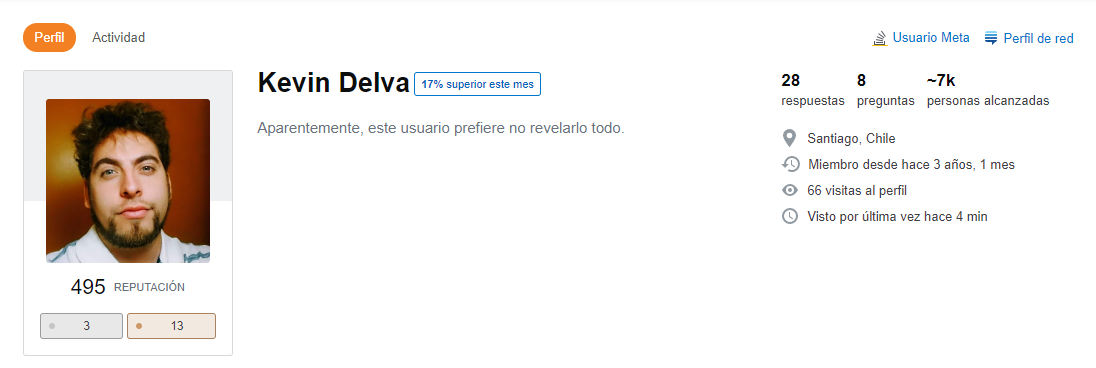

In [ ]:
r = requests.get("https://es.stackoverflow.com/users/69657/kevin-delva?tab=tags")
soup = bs(r.content)
print(soup.prettify())

<!DOCTYPE html>
<html class="">
 <head>
  <title>
   Usuario Kevin Delva - Stack Overflow en español
  </title>
  <link href="https://cdn.sstatic.net/Sites/es/Img/favicon.ico?v=9c017e88b153" rel="shortcut icon"/>
  <link href="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon.png?v=7739871010e6" rel="apple-touch-icon"/>
  <link href="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon.png?v=7739871010e6" rel="image_src"/>
  <link href="/opensearch.xml" rel="search" title="Stack Overflow en español" type="application/opensearchdescription+xml"/>
  <link href="https://es.stackoverflow.com/users/69657/kevin-delva" rel="canonical"/>
  <meta content="website" property="og:type"/>
  <meta content="https://es.stackoverflow.com/users/69657/kevin-delva" property="og:url"/>
  <meta content="Stack Overflow en español" property="og:site_name"/>
  <meta content="https://cdn.sstatic.net/Sites/es/Img/apple-touch-icon@2.png?v=62634cce9d6c" itemprop="image primaryImageOfPage" property="og:image"/

Localizando la tabla


In [ ]:
soup.find(id="user-tab-tags").contents[3]


<div class="user-tab-content">
<table class="user-tags">
<tbody>
<tr>
<td><div class="answer-votes" onclick="window.location.href='/search?q=user:69657+[php]'" title="Formuló 5 preguntas que no son wiki con una puntuación total de 2. Proporcionó 21 respuestas que no son de wiki con una puntuación total de 10.">10</div>
<a class="post-tag" href="/search?q=user:69657+[php]" title='mostrar todas las publicaciones de este usuario en "php"'>php</a>
<span class="item-multiplier" title="26 publicaciones en la etiqueta php"><span class="item-multiplier-x">×</span> <span class="item-multiplier-count">26</span></span></td>
<td><div class="answer-votes" onclick="window.location.href='/search?q=user:69657+[bootstrap]'" title=" Proporcionó 1 respuesta que no es de wiki con una puntuación total de 1.">1</div>
<a class="post-tag" href="/search?q=user:69657+[bootstrap]" title='mostrar todas las publicaciones de este usuario en "bootstrap"'>bootstrap</a>
</td>
<td><div class="answer-votes" onclick="win

Filtramos los tags usados por el usuario y comprobamos que son los que aparecen en la web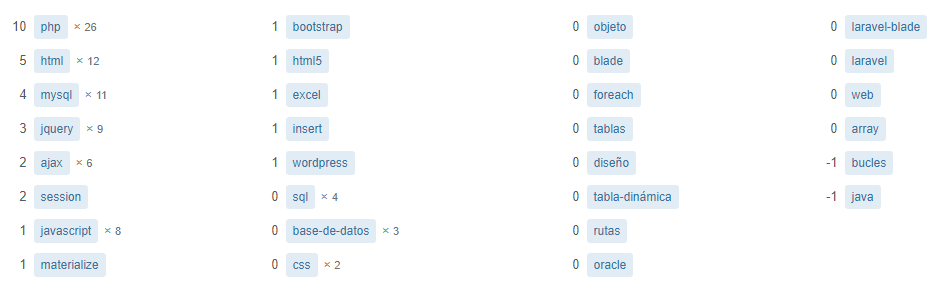

In [ ]:
import pandas as pd
table = soup.select("table.user-tags")[0]
columns = table.find("tbody").find_all("a")
columns_names = [c.string for c in columns]
columns_names

['php',
 'bootstrap',
 'objeto',
 'laravel-blade',
 'html',
 'html5',
 'blade',
 'laravel',
 'mysql',
 'excel',
 'foreach',
 'web',
 'jquery',
 'insert',
 'tablas',
 'array',
 'ajax',
 'wordpress',
 'diseño',
 'bucles',
 'session',
 'sql',
 'tabla-dinámica',
 'java',
 'javascript',
 'base-de-datos',
 'rutas',
 'materialize',
 'css',
 'oracle']

In [ ]:
from wordcloud import WordCloud, STOPWORDS


Iteramos los tags

In [ ]:
wordcloud2 = ' '.join(columns_names)
wordcloud2

'php bootstrap objeto laravel-blade html html5 blade laravel mysql excel foreach web jquery insert tablas array ajax wordpress diseño bucles session sql tabla-dinámica java javascript base-de-datos rutas materialize css oracle'

# **Generamos el WordCloud**

In [ ]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(wordcloud2)

(-0.5, 1023.5, 799.5, -0.5)

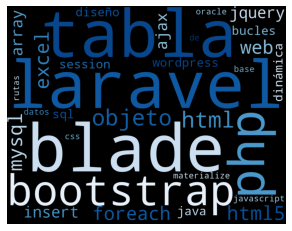

In [ ]:

plt.imshow(wordcloud)
plt.axis('off')


# **Diseño de el WordCloud (opcional)**

Autorizamos a Colab el acceso a nuestra cuenta de drive

In [ ]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [ ]:
drive_service = google_authenticate()

para este caso definimos una variable read para poder importar nuestra imagen

In [ ]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

Importamos nuestra imagen de drive y especificamos los parámetros que tendrá en mi caso elegí el logo de Python

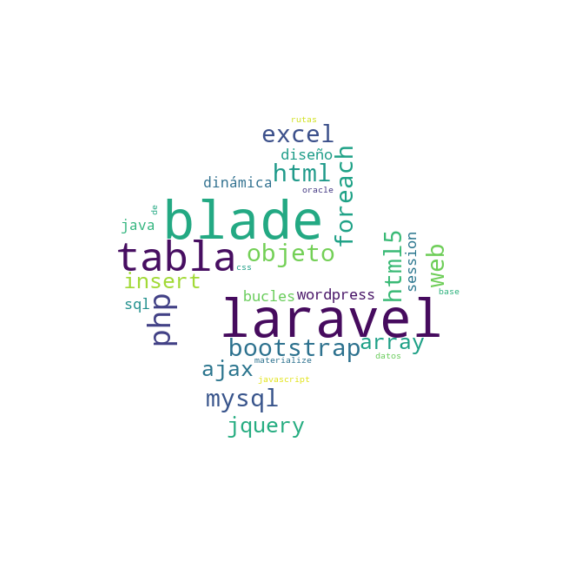

In [ ]:
image_file = read_file("18J4WGJsfkZQ2IWNcFRfKSQiTpYu4jx9J")


image_mask = np.array(Image.open(image_file))


stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=image_mask,
               stopwords=stopwords)
wc.generate(wordcloud2)

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()